vertics = 10
ver_num = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

random graph 1
edges = [(0, 4), (0, 6), (0, 7), (0, 9), (1, 6), (2, 3), (2, 5), (2, 8), (3, 4), (3, 8), (5, 6), (5, 8), (6, 8), (7, 9), (8, 9)]

random graph 2
edges = [(0, 2), (0, 3), (0, 6), (0, 8), (0, 9), (1, 2), (2, 3), (2, 4), (2, 7), (2, 8), (2, 9), (3, 5), (3, 7), (3, 9), (4, 5), (4, 7), (4, 8), (5, 8), (5, 9), (6, 9), (7, 8), (7, 9)]

random graph 3
edges = [(0, 2), (0, 5), (0, 6), (0, 8), (1, 3), (1, 4), (1, 6), (1, 7), (1, 8), (1, 9), (2, 5), (2, 9), (3, 4), (3, 5), (4, 8), (4, 9), (5, 8), (6, 7), (6, 9), (7, 9)]

random graph 4
edges = [(0, 1), (0, 4), (0, 5), (0, 7), (0, 8), (1, 2), (1, 3), (1, 6), (1, 7), (2, 4), (2, 6), (2, 7), (3, 5), (3, 6), (3, 7), (4, 6), (4, 7), (4, 9), (6, 8), (7, 8), (8, 9)]

random graph 5
edges = [(0, 3), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (2, 6), (2, 7), (3, 5), (3, 6), (3, 7), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7

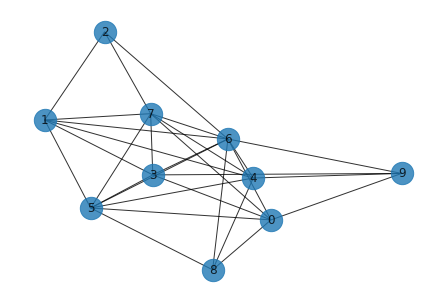

In [1]:
import warnings
warnings.simplefilter(action='ignore',)

from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import Aer, execute
from qiskit.circuit import Parameter

from time import time
import networkx as nx

n = 10
iter = 5
print("vertics = " + str(n))
print("ver_num = " + str([i for i in range(n)]))

value_dc_qaoa_ls = []
ubound_sdp_ls = []
for i in range(iter):
    print("\nrandom graph " + str(i+1))

    G = nx.erdos_renyi_graph(n, 0.1, 100 * i, directed=False)
    while nx.is_connected(G) == False:
        G = nx.erdos_renyi_graph(n, 0.5, directed=False)
    print("edges = " + str(list(G.edges)))
nx.draw(G, with_labels=True, alpha=0.8, node_size=500)

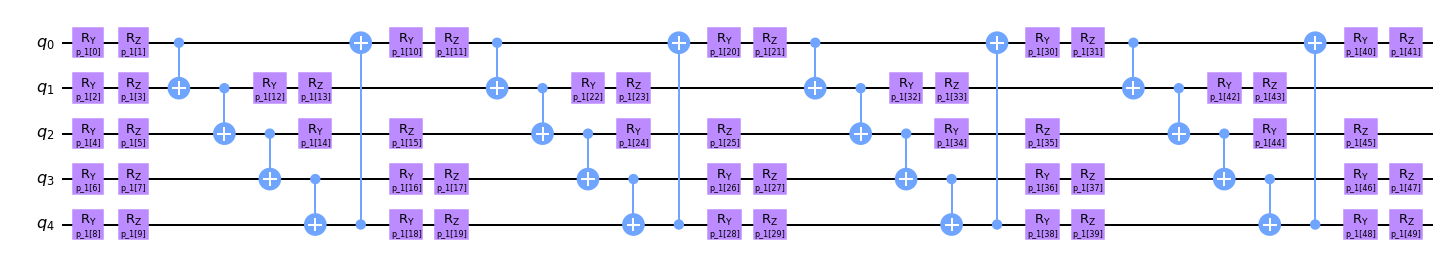

In [2]:
repeat = 5

qc_u1 = QuantumCircuit(5)
pv_u1 = ParameterVector('p_1', 10*repeat)

t = 0
for i in range(repeat):   
    qc_u1.ry(pv_u1[t], 0)
    qc_u1.rz(pv_u1[t+1],0)
    qc_u1.ry(pv_u1[t+2], 1)
    qc_u1.rz(pv_u1[t+3], 1)
    qc_u1.ry(pv_u1[t+4], 2)
    qc_u1.rz(pv_u1[t+5], 2)
    qc_u1.ry(pv_u1[t+6], 3)
    qc_u1.rz(pv_u1[t+7], 3)
    qc_u1.ry(pv_u1[t+8], 4)
    qc_u1.rz(pv_u1[t+9], 4)
    if i < repeat-1: 
        qc_u1.cnot(0,1)
        qc_u1.cnot(1,2)
        qc_u1.cnot(2,3)
        qc_u1.cnot(3,4)
        qc_u1.cnot(4,0)
    t += 10

qc_u1.draw(output="mpl",fold=-1)

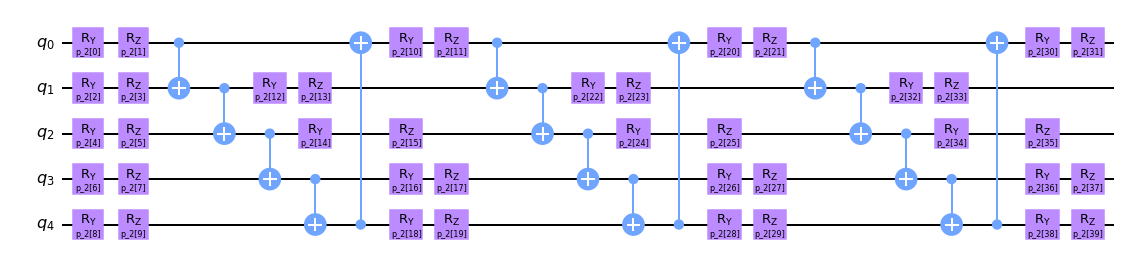

In [3]:
repeat = 4

qc_u2 = QuantumCircuit(5)
pv_u2 = ParameterVector('p_2', 10*repeat)

t = 0
for i in range(repeat):   
    qc_u2.ry(pv_u2[t], 0)
    qc_u2.rz(pv_u2[t+1],0)
    qc_u2.ry(pv_u2[t+2], 1)
    qc_u2.rz(pv_u2[t+3], 1)
    qc_u2.ry(pv_u2[t+4], 2)
    qc_u2.rz(pv_u2[t+5], 2)
    qc_u2.ry(pv_u2[t+6], 3)
    qc_u2.rz(pv_u2[t+7], 3)
    qc_u2.ry(pv_u2[t+8], 4)
    qc_u2.rz(pv_u2[t+9], 4)
    if i < repeat-1: 
        qc_u2.cnot(0,1)
        qc_u2.cnot(1,2)
        qc_u2.cnot(2,3)
        qc_u2.cnot(3,4)
        qc_u2.cnot(4,0)
    t += 10

qc_u2.draw(output="mpl",fold=-1)

In [4]:
def create_circ(G, theta):
    
    qc = QuantumCircuit(10)
    
    r = 5
    pv = ParameterVector('p',2*10*r)
    
    t = 0
    for i in range(r):   
        qc.ry(theta[t], 0)
        qc.rz(theta[t+1],0)
        qc.ry(theta[t+2], 1)
        qc.rz(theta[t+3], 1)
        qc.ry(theta[t+4], 2)
        qc.rz(theta[t+5], 2)
        qc.ry(theta[t+6], 3)
        qc.rz(theta[t+7], 3)
        qc.ry(theta[t+8], 4)
        qc.rz(theta[t+9], 4)
        if i < r-1: 
            qc.cnot(0,1)
            qc.cnot(1,2)
            qc.cnot(2,3)
            qc.cnot(3,4)
            qc.cnot(4,0)
        t += 10

    t = int(len(theta)/2)
    for i in range(r):   
        qc.ry(theta[t], 5)
        qc.rz(theta[t+1],5)
        qc.ry(theta[t+2], 6)
        qc.rz(theta[t+3], 6)
        qc.ry(theta[t+4], 7)
        qc.rz(theta[t+5], 7)
        qc.ry(theta[t+6], 8)
        qc.rz(theta[t+7], 8)
        qc.ry(theta[t+8], 9)
        qc.rz(theta[t+9], 9)
        if i < r-1: 
            qc.cnot(5,6)
            qc.cnot(6,7)
            qc.cnot(7,8)
            qc.cnot(8,9)
            qc.cnot(9,0)
        t += 10
    
    qc.measure_all()
    return qc

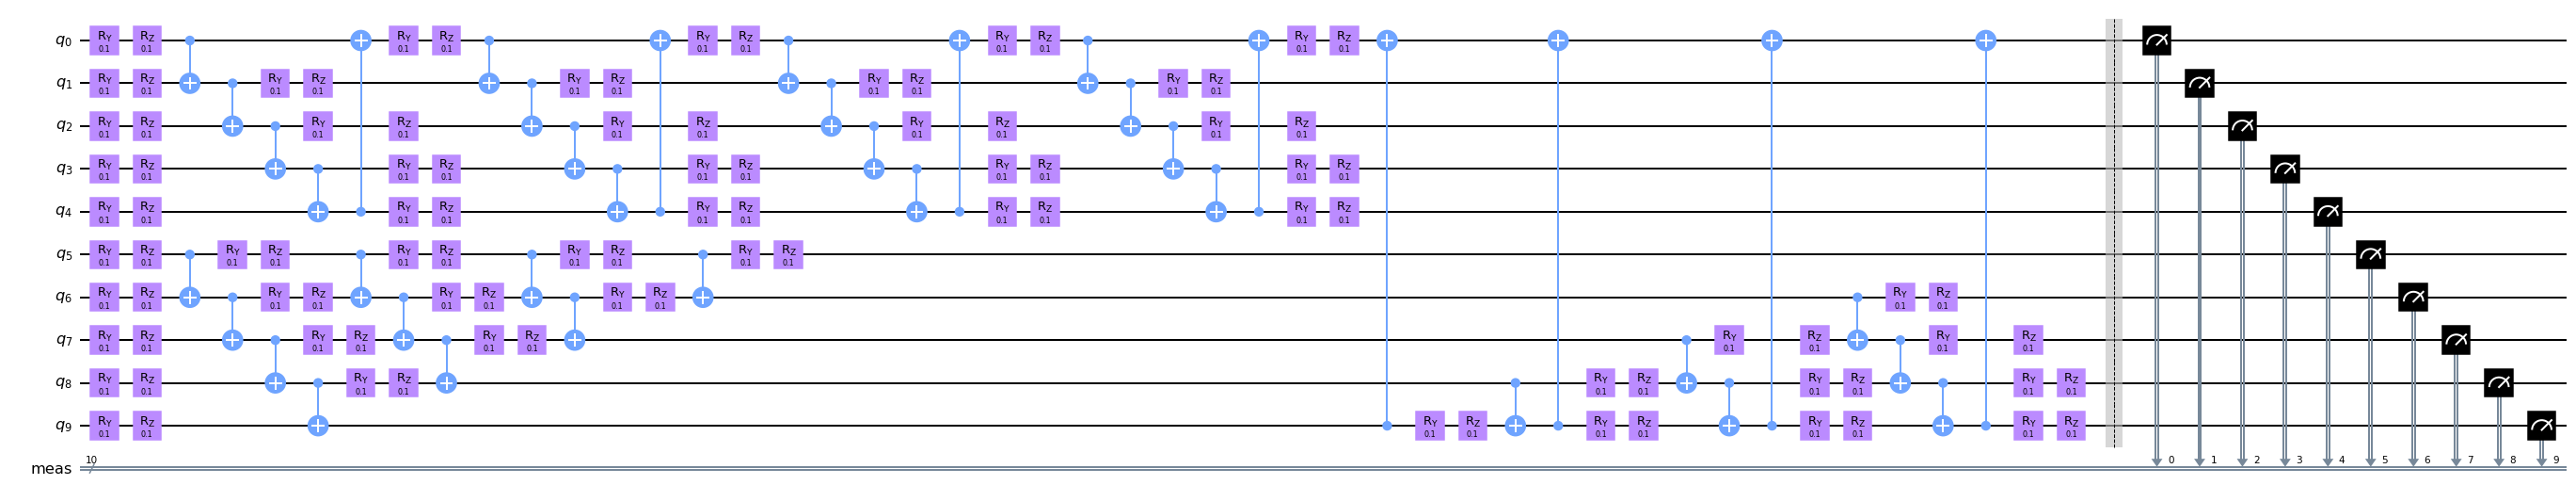

In [5]:
para = []
repeat = 5
for i in range(repeat*2*10): para.append(0.1)

qc_test = create_circ(G, para)

qc_test.draw(output="mpl", fold=-1)

In [6]:
def maxcut_obj(x, G):
    obj = 0
    for i, j in G.edges():
        if x[i] != x[j]:
            obj -= 1
            
    return obj

def compute_expectation(counts, G):
    
    avg = 0
    sum_count = 0
    for bitstring, count in counts.items():
        
        obj = maxcut_obj(bitstring, G)
        avg += obj * count
        sum_count += count
        
    return avg/sum_count

def get_expectation(G, p, shots=1024):
     
    backend = Aer.get_backend('qasm_simulator')
    backend.shots = shots
    
    def execute_circ(theta):
        
        qc = create_circ(G, theta)
        counts = backend.run(qc, seed_simulator=10, 
                             nshots=1024).result().get_counts()
        
        return compute_expectation(counts, G)
    
    return execute_circ

In [7]:
from scipy.optimize import minimize
start = time()
expectation = get_expectation(G, p=50)
res = minimize(expectation, 
              para, 
              method='COBYLA')
end = time()
print("Cost time:",end-start)
print(res)

Cost time: 12.982776165008545
     fun: -18.5927734375
   maxcv: 0.0
 message: 'Maximum number of function evaluations has been exceeded.'
    nfev: 1000
  status: 2
 success: False
       x: array([ 1.10226738e+00,  5.05279265e-01,  4.43128346e-01, -2.49679418e-03,
        1.89761187e-01,  1.42895353e-01,  1.92468171e+00,  7.10192186e-01,
        6.22234434e-01, -1.37093603e-02,  7.72590680e-01,  1.72983802e-01,
        1.54796579e+00, -2.54186518e-01,  1.61999451e-01, -7.35908094e-02,
        1.12459504e+00,  2.39718152e-01,  1.29124130e+00,  2.85938825e-01,
        1.61474654e+00,  4.91958418e-02, -1.93447139e-01, -7.89119113e-02,
        1.17538194e+00,  3.33076640e-02,  1.24809544e+00, -1.15892647e-01,
        1.11115176e+00,  9.70190687e-01,  8.53536831e-01,  1.84291063e-01,
        1.66615763e+00,  7.87110935e-01,  1.04395850e+00,  7.32928515e-01,
       -5.09601404e-01,  1.32882208e-01, -2.29739268e-01,  9.10248691e-01,
        3.19015948e-01,  1.69431352e+00, -9.21139173e-02, 

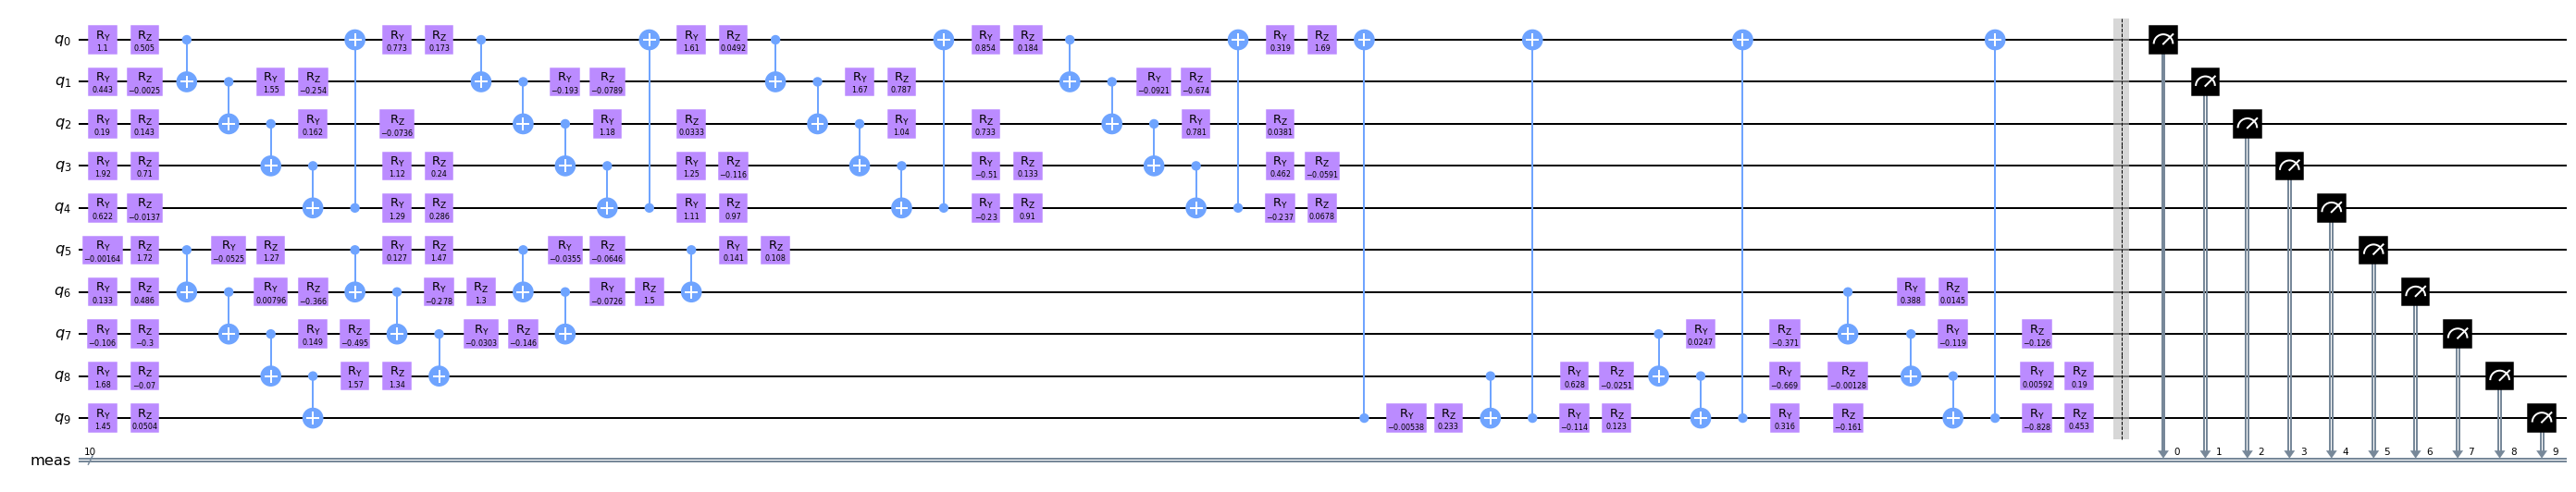

In [8]:
from qiskit.visualization import plot_histogram

backend = Aer.get_backend('aer_simulator')
backend.shots = 1024

qc_res = create_circ(G, res.x)
qc_res.draw(output="mpl",fold=-1)

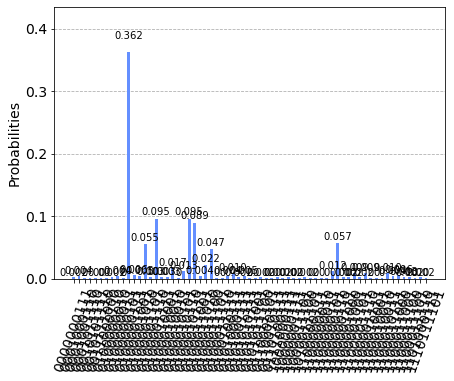

In [9]:
result = backend.run(qc_res, seed_simulator=10).result()
counts = result.get_counts()
plot_histogram(counts)

In [10]:
sort = dict(sorted(counts.items(), key=lambda item: item[1], reverse=True))
print("Best 4 solutions:")
es = 0
for i in sort:
    print(i)
    es+=1
    if es == 4: break

Best 4 solutions:
0010010111
0010011101
0010010110
0010011100


In [10]:
import cvxpy as cvx
import networkx as nx

def sdp_solver(G):

    n = len(G)
    adj_mat = nx.adjacency_matrix(G).toarray()
    Y = cvx.Variable((n, n), PSD=True)
    cut_size = 0.25 * cvx.sum(cvx.multiply(adj_mat, 1 - Y))
    problem = cvx.Problem(cvx.Maximize(cut_size), [cvx.diag(Y) == 1])
    opt_val = problem.solve(cvx.SCS)

    return opt_val

ubound_sdp = sdp_solver(G)
ubound_sdp_ls.append(ubound_sdp)
print("SDP upper bound: " + str(ubound_sdp))

SDP upper bound: 20.268677928243296


In [11]:
ans = "0010010111"
cut_dc_qaoa1 = ["solid" if ans[u] == ans[v] else "dashed" for (u, v) in list(G.edges)]
value_dc_qaoa = cut_dc_qaoa1.count("dashed")
value_dc_qaoa_ls.append(value_dc_qaoa)
print("binary string: " + str(ans) + ", max cut = " + str(float(value_dc_qaoa))) 

binary string: 0010010111, max cut = 19.0


#### Parameterized $U_1$

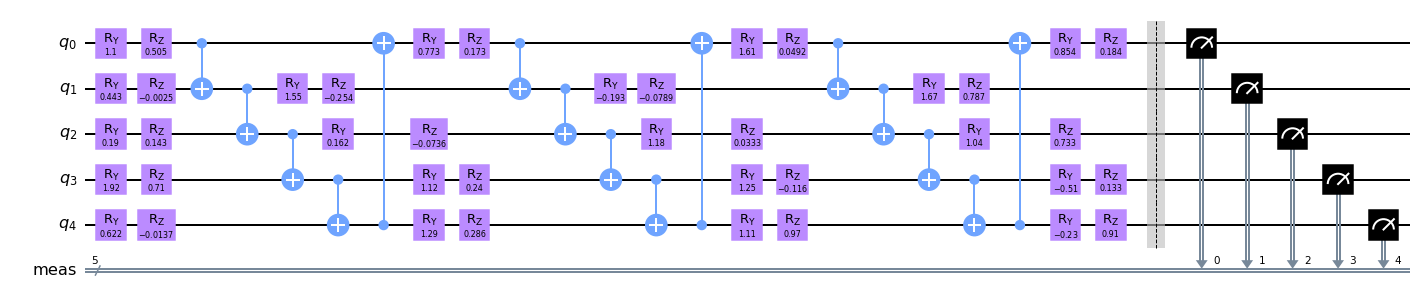

In [12]:
repeat = 4

qc_u1 = QuantumCircuit(5)
pv_u1 = ParameterVector('p_1', 10*repeat)

t = 0
for i in range(repeat):   
    qc_u1.ry(res.x[t], 0)
    qc_u1.rz(res.x[t+1],0)
    qc_u1.ry(res.x[t+2], 1)
    qc_u1.rz(res.x[t+3], 1)
    qc_u1.ry(res.x[t+4], 2)
    qc_u1.rz(res.x[t+5], 2)
    qc_u1.ry(res.x[t+6], 3)
    qc_u1.rz(res.x[t+7], 3)
    qc_u1.ry(res.x[t+8], 4)
    qc_u1.rz(res.x[t+9], 4)
    if i < repeat-1: 
        qc_u1.cnot(0,1)
        qc_u1.cnot(1,2)
        qc_u1.cnot(2,3)
        qc_u1.cnot(3,4)
        qc_u1.cnot(4,0)
    t += 10

qc_u1.measure_all()
qc_u1.draw(output="mpl", fold=-1)

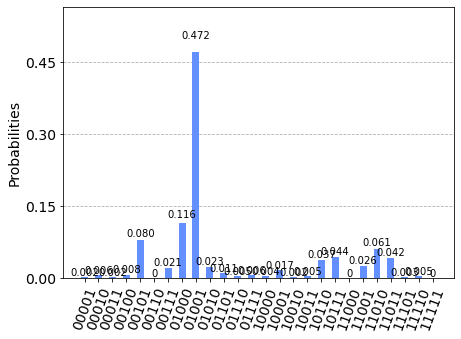

In [13]:
result = backend.run(qc_u1, seed_simulator=10).result()
counts = result.get_counts()
plot_histogram(counts)

#### Parameterized $U_2$

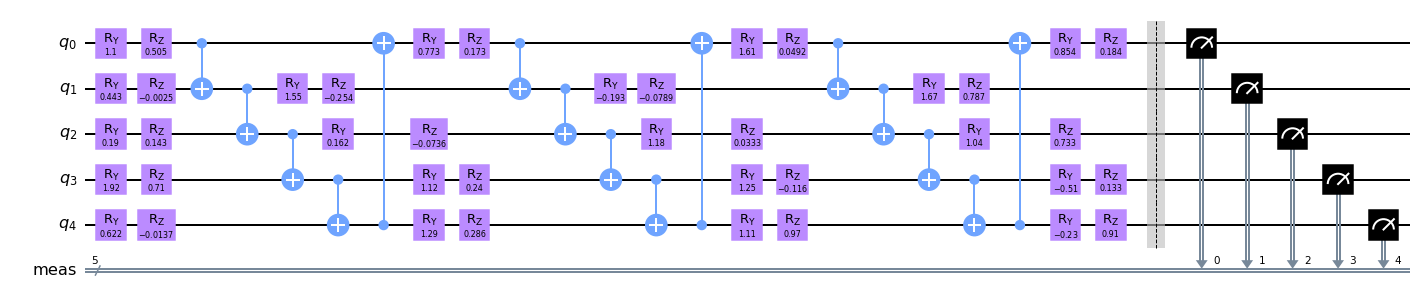

In [14]:
repeat = 4

qc_u2 = QuantumCircuit(5)
pv_u2 = ParameterVector('p_2', 10*repeat)

t = 0
for i in range(repeat):   
    qc_u2.ry(res.x[t], 0)
    qc_u2.rz(res.x[t+1],0)
    qc_u2.ry(res.x[t+2], 1)
    qc_u2.rz(res.x[t+3], 1)
    qc_u2.ry(res.x[t+4], 2)
    qc_u2.rz(res.x[t+5], 2)
    qc_u2.ry(res.x[t+6], 3)
    qc_u2.rz(res.x[t+7], 3)
    qc_u2.ry(res.x[t+8], 4)
    qc_u2.rz(res.x[t+9], 4)
    if i < repeat-1: 
        qc_u2.cnot(0,1)
        qc_u2.cnot(1,2)
        qc_u2.cnot(2,3)
        qc_u2.cnot(3,4)
        qc_u2.cnot(4,0)
    t += 10

qc_u2.measure_all()
qc_u2.draw(output="mpl",fold=-1)

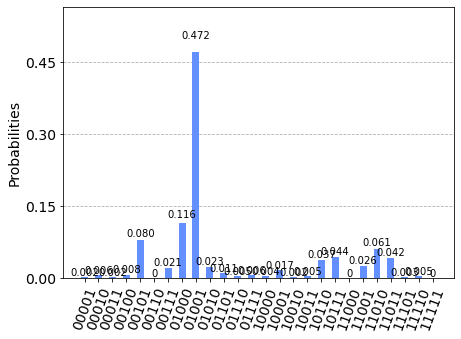

In [15]:
result = backend.run(qc_u2, seed_simulator=10).result()
counts = result.get_counts()
plot_histogram(counts)